# ÍNDICE
# **Santander Track Data**
# **Introducción a Python para Análisis de Datos 🐍 📊**
# *Notebook 6: Trabajando con Fechas*
---

### TABLE OF CONTENTS
1. INTRODUCCIÓN A FECHAS
2. OPERACIONES BÁSICAS CON FECHAS
3. TRABAJANDO CON FECHAS EN PANDAS
4. AGREGANDO DATA HISTÓRICA
5. EJERCICIOS

### Juan Martin Bellido
* [linkedin.com/in/jmartinbellido](https://www.linkedin.com/in/jmartinbellido/)
* jmbellido@isdi.education



In [1]:
# importamos librerías
import pandas as pd
from datetime import date
from datetime import timedelta

# Introducción a fechas 
---
Python no reconoce fechas/tiempo como tipo de variable de forma nativa. Por ello, necesitamos utilizar librerías específicas para trabajar con este formato.




### Introducción

In [2]:
# creamos nuestro primer objeto de fecha
input_date = date(1969,7,20) # moon landing date
type(input_date)

datetime.date

In [3]:
# podemos extraer componentes específicos de fecha
print(input_date.day)
print(input_date.month)
print(input_date.year)
print(input_date.weekday())

20
7
1969
6


In [4]:
# podemos crear una lista que contenga muchas inputs de fecha
date_list=[date(1989,11,1),date(1969,7,20)]
min(date_list) # obtenemos la primer fecha en la lista

datetime.date(1969, 7, 20)

In [5]:
# podemos consultar la fecha actual
date.today()

datetime.date(2022, 3, 20)

In [7]:
# ¿en qué día de la semana nos encontramos? 0=lunes
date.today().weekday()

6

### Transformando fechas en texto


El método .strftime() proporciona mayor flexibilidad al extraer componentes de un objeto de tipo fecha.


In [11]:
# extraer año
date.today().strftime('%Y')

'2022'

In [10]:
# extraer mes
date.today().strftime('%m')

'03'

In [9]:
# extraer día
date.today().strftime('%d')

'20'

In [8]:
# extraer texto + fecha
date.today().strftime('Hoy es %d/%m/%Y')

'Hoy es 20/03/2022'

In [ ]:
# an alternative is using the .isoformat() method
date.today().isoformat()

'2022-02-22'

# OPERACIONES BÁSICAS CON FECHAS
---


In [ ]:
# we create an object with my bday
date_bday=date(1989,11,1)

In [ ]:
# how many days passed since my bday?
delta = date.today() - date_bday
delta.days

11801

In [ ]:
# we can use the timedelta() function to add days/weeks
date.today() + timedelta(days=5)

datetime.date(2022, 2, 27)

In [ ]:
date.today() + timedelta(weeks=10)

datetime.date(2022, 5, 3)

# TRABAJANDO CON FECHAS EN PANDAS
---

In [ ]:
# importamos df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
# utilizamos pd.to_datetime() para convertir una columna en formato fecha
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [ ]:
# si fuera necesario, podemos especificar formato de fecha
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'],format='%Y-%m-%d')
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [ ]:
# creamos un nuevo campo que contenga el año de la fecha
df_amzn['year'] = df_amzn['Date'].dt.year

In [ ]:
# creamos un nuevo campo que contenga el día de la fecha
df_amzn['day_name'] = df_amzn['Date'].dt.day_name()

In [ ]:
# creamos un nuevo campo que contenga el número de semana
df_amzn['week_num'] = df_amzn['Date'].dt.isocalendar().week

In [ ]:
# invocamos df
df_amzn.head()

,Date,Open,High,Low,Close,Volume,year,day_name,week_num
0,2010-01-04,136.25,136.61,133.14,133.90,7600543,2010,Monday,1
1,2010-01-05,133.43,135.48,131.81,134.69,8856456,2010,Tuesday,1
2,2010-01-06,134.60,134.73,131.65,132.25,7180977,2010,Wednesday,1
3,2010-01-07,132.01,132.32,128.80,130.00,11030124,2010,Thursday,1
4,2010-01-08,130.56,133.68,129.03,133.52,9833829,2010,Friday,1


# AGREGANDO DATA HISTÓRICA
---

In [ ]:
# tras crear nuevos campos con componentes de fecha, podemos utilizar los nuevos campos para agrupar agregaciones
df_amzn.groupby(['year','week_num']).agg({'Open':'mean'})

Open
year week_num           
2010 1          133.3700
     2          129.5660
     3          126.5475
     4          123.5780
     5          118.7220
...                  ...
2017 25        1003.6940
     26         987.3720
     27         967.1325
     28         997.1340
     29        1004.6900

[394 rows x 1 columns]

In [ ]:
# agregamos media anual
output = df_amzn.groupby('year').agg({'Open':'mean'})
output

,Open
year,
2010,138.971036
2011,196.658413
2012,220.011040
2013,297.866270
2014,332.799841
2015,478.123532
2016,699.756587
2017,900.935259


In [ ]:
# creamos un nuevo campo que contenga los datos del año anterior
output['open_1YA'] = output['Open'].shift(1)
output

,Open,open_1YA
year,,
2010,138.971036,NaN
2011,196.658413,138.971036
2012,220.011040,196.658413
2013,297.866270,220.011040
2014,332.799841,297.866270
2015,478.123532,332.799841
2016,699.756587,478.123532
2017,900.935259,699.756587


In [ ]:
# calculamos crecimiento año a año 
output['yoy_growth'] = (output['Open'] / output['open_1YA']) - 1
output['yoy_growth'] = output['yoy_growth'].round(2)
output

,Open,open_1YA,yoy_growth
year,,,
2010,138.971036,NaN,NaN
2011,196.658413,138.971036,0.42
2012,220.011040,196.658413,0.12
2013,297.866270,220.011040,0.35
2014,332.799841,297.866270,0.12
2015,478.123532,332.799841,0.44
2016,699.756587,478.123532,0.46
2017,900.935259,699.756587,0.29


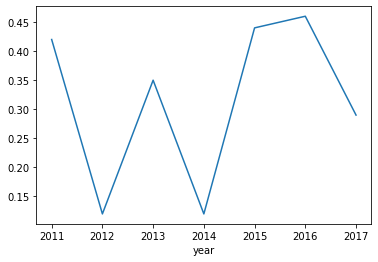

In [ ]:
# finalmente, graficamos crecimiento YoY
output['yoy_growth'].plot()

# EJERCICIOS

##### EX 1: Agregando data histórica
---
Utilizar el código debajo para importar cotización diaria del BTC para los últimos 28 días. Agregar el dataframe a data reportada semanalmente, calculando crecimiento semanal (%).



In [ ]:
# instalamos, si hace falta librería yfinance
!pip install yfinance

In [3]:
# Importing libraries
import yfinance as yf
import pandas as pd
from datetime import date
from datetime import timedelta

In [4]:
input_start = date.today() + timedelta(days=-29)
input_end = date.today() + timedelta(days=-1)

In [5]:
output = yf.download("BTC-USD", start=input_start, end=input_end)

[*********************100%***********************]  1 of 1 completed


In [6]:
output = output.reset_index()
output.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-20,40118.101562,40119.890625,38112.812500,38431.378906,38431.378906,18340576452
1,2022-02-21,38423.210938,39394.437500,36950.476562,37075.281250,37075.281250,29280402798
2,2022-02-22,37068.769531,38359.855469,36488.933594,38286.027344,38286.027344,25493150450
3,2022-02-23,38285.281250,39122.394531,37201.816406,37296.570312,37296.570312,21849073843
4,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093


In [7]:
output['week_num'] = output.Date.dt.isocalendar().week

In [8]:
agg_output = output.groupby('week_num').agg({'Open':'mean'})

In [9]:
agg_output['open_1WA'] = agg_output['Open'].shift(1)

In [10]:
agg_output

,Open,open_1WA
week_num,,
7,40118.101562,NaN
8,38243.050781,40118.101562
9,41456.300781,38243.050781
10,39189.321987,41456.300781
11,40416.839286,39189.321987


In [11]:
agg_output['wow_growth'] = (agg_output['Open'] / agg_output['open_1WA']) - 1

In [12]:
agg_output['wow_growth'] = agg_output['wow_growth'].round(2)
agg_output

,Open,open_1WA,wow_growth
week_num,,,
7,40118.101562,NaN,NaN
8,38243.050781,40118.101562,-0.05
9,41456.300781,38243.050781,0.08
10,39189.321987,41456.300781,-0.05
11,40416.839286,39189.321987,0.03
